In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd
#Alternatively: download data from https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
df = pd.read_csv('/kaggle/input/heart-disease-data/heart_disease_uci.csv')
df.head(10)

id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   
5   6   56    Male  Cleveland  atypical angina     120.0  236.0  False   
6   7   62  Female  Cleveland     asymptomatic     140.0  268.0  False   
7   8   57  Female  Cleveland     asymptomatic     120.0  354.0  False   
8   9   63    Male  Cleveland     asymptomatic     130.0  254.0  False   
9  10   53    Male  Cleveland     asymptomatic     140.0  203.0   True   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   
5          normal   178.0  False      0.8    upsloping  0.0   
6  lv hypertrophy   160.0  False      3.6  downsloping  2.0   
7          normal   163.0   True      0.6    upsloping  0.0   
8  lv hypertrophy   147.0  False      1.4         flat  1.0   
9  lv hypertrophy   155.0   True      3.1  downsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  
5             normal    0  
6             normal    3  
7             normal    0  
8  reversable defect    2  
9  reversable defect    1

In [33]:
df = df.set_index('id')
df

age     sex        dataset               cp  trestbps   chol    fbs  \
id                                                                         
1     63    Male      Cleveland   typical angina     145.0  233.0   True   
2     67    Male      Cleveland     asymptomatic     160.0  286.0  False   
3     67    Male      Cleveland     asymptomatic     120.0  229.0  False   
4     37    Male      Cleveland      non-anginal     130.0  250.0  False   
5     41  Female      Cleveland  atypical angina     130.0  204.0  False   
..   ...     ...            ...              ...       ...    ...    ...   
916   54  Female  VA Long Beach     asymptomatic     127.0  333.0   True   
917   62    Male  VA Long Beach   typical angina       NaN  139.0  False   
918   55    Male  VA Long Beach     asymptomatic     122.0  223.0   True   
919   58    Male  VA Long Beach     asymptomatic       NaN  385.0   True   
920   62    Male  VA Long Beach  atypical angina     120.0  254.0  False   

              restecg  thalch  exang  oldpeak        slope   ca  \
id                                                                
1      lv hypertrophy   150.0  False      2.3  downsloping  0.0   
2      lv hypertrophy   108.0   True      1.5         flat  3.0   
3      lv hypertrophy   129.0   True      2.6         flat  2.0   
4              normal   187.0  False      3.5  downsloping  0.0   
5      lv hypertrophy   172.0  False      1.4    upsloping  0.0   
..                ...     ...    ...      ...          ...  ...   
916  st-t abnormality   154.0  False      0.0          NaN  NaN   
917  st-t abnormality     NaN    NaN      NaN          NaN  NaN   
918  st-t abnormality   100.0  False      0.0          NaN  NaN   
919    lv hypertrophy     NaN    NaN      NaN          NaN  NaN   
920    lv hypertrophy    93.0   True      0.0          NaN  NaN   

                  thal  num  
id                           
1         fixed defect    0  
2               normal    2  
3    reversable defect    1  
4               normal    0  
5               normal    0  
..                 ...  ...  
916                NaN    1  
917                NaN    0  
918       fixed defect    2  
919                NaN    0  
920                NaN    1  

[920 rows x 15 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


# Descriptive Analysis

Let's see the statistic summary:

In [4]:
df.describe()

id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  309.000000  920.000000  
mean     0.676375    0.995652  
std      0.935653    1.142693  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.000000    2.000000  
max      3.000000    4.000000

In [5]:
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [6]:
df['slope'].unique()

array(['downsloping', 'flat', 'upsloping', nan], dtype=object)

Let's visualize all plots in different scales:numeric_columns

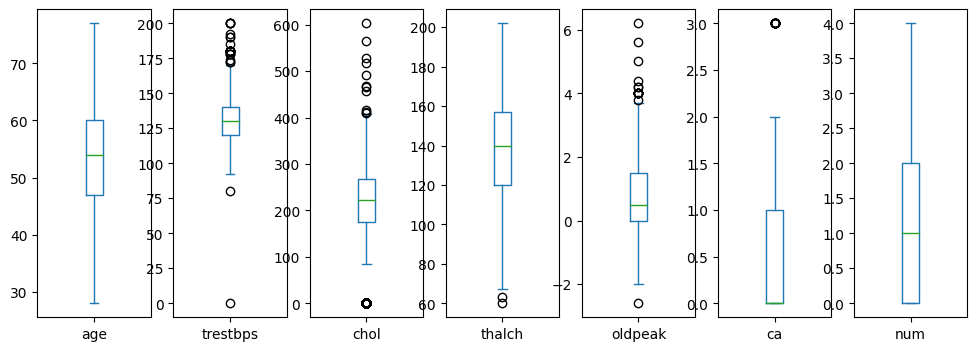

In [35]:
from matplotlib import pyplot as plt
#select numeric columns
numeric_columns = df.select_dtypes(include='number').columns #remove first column id
n = len(numeric_columns)
plt.figure(figsize=(12,4))
for i,var in enumerate(numeric_columns):
    plt.subplot(1,n,i+1)
    df[var].plot.box()

Age looks well distributed. trestbps, chol, thalch, oldpeak have outliers.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


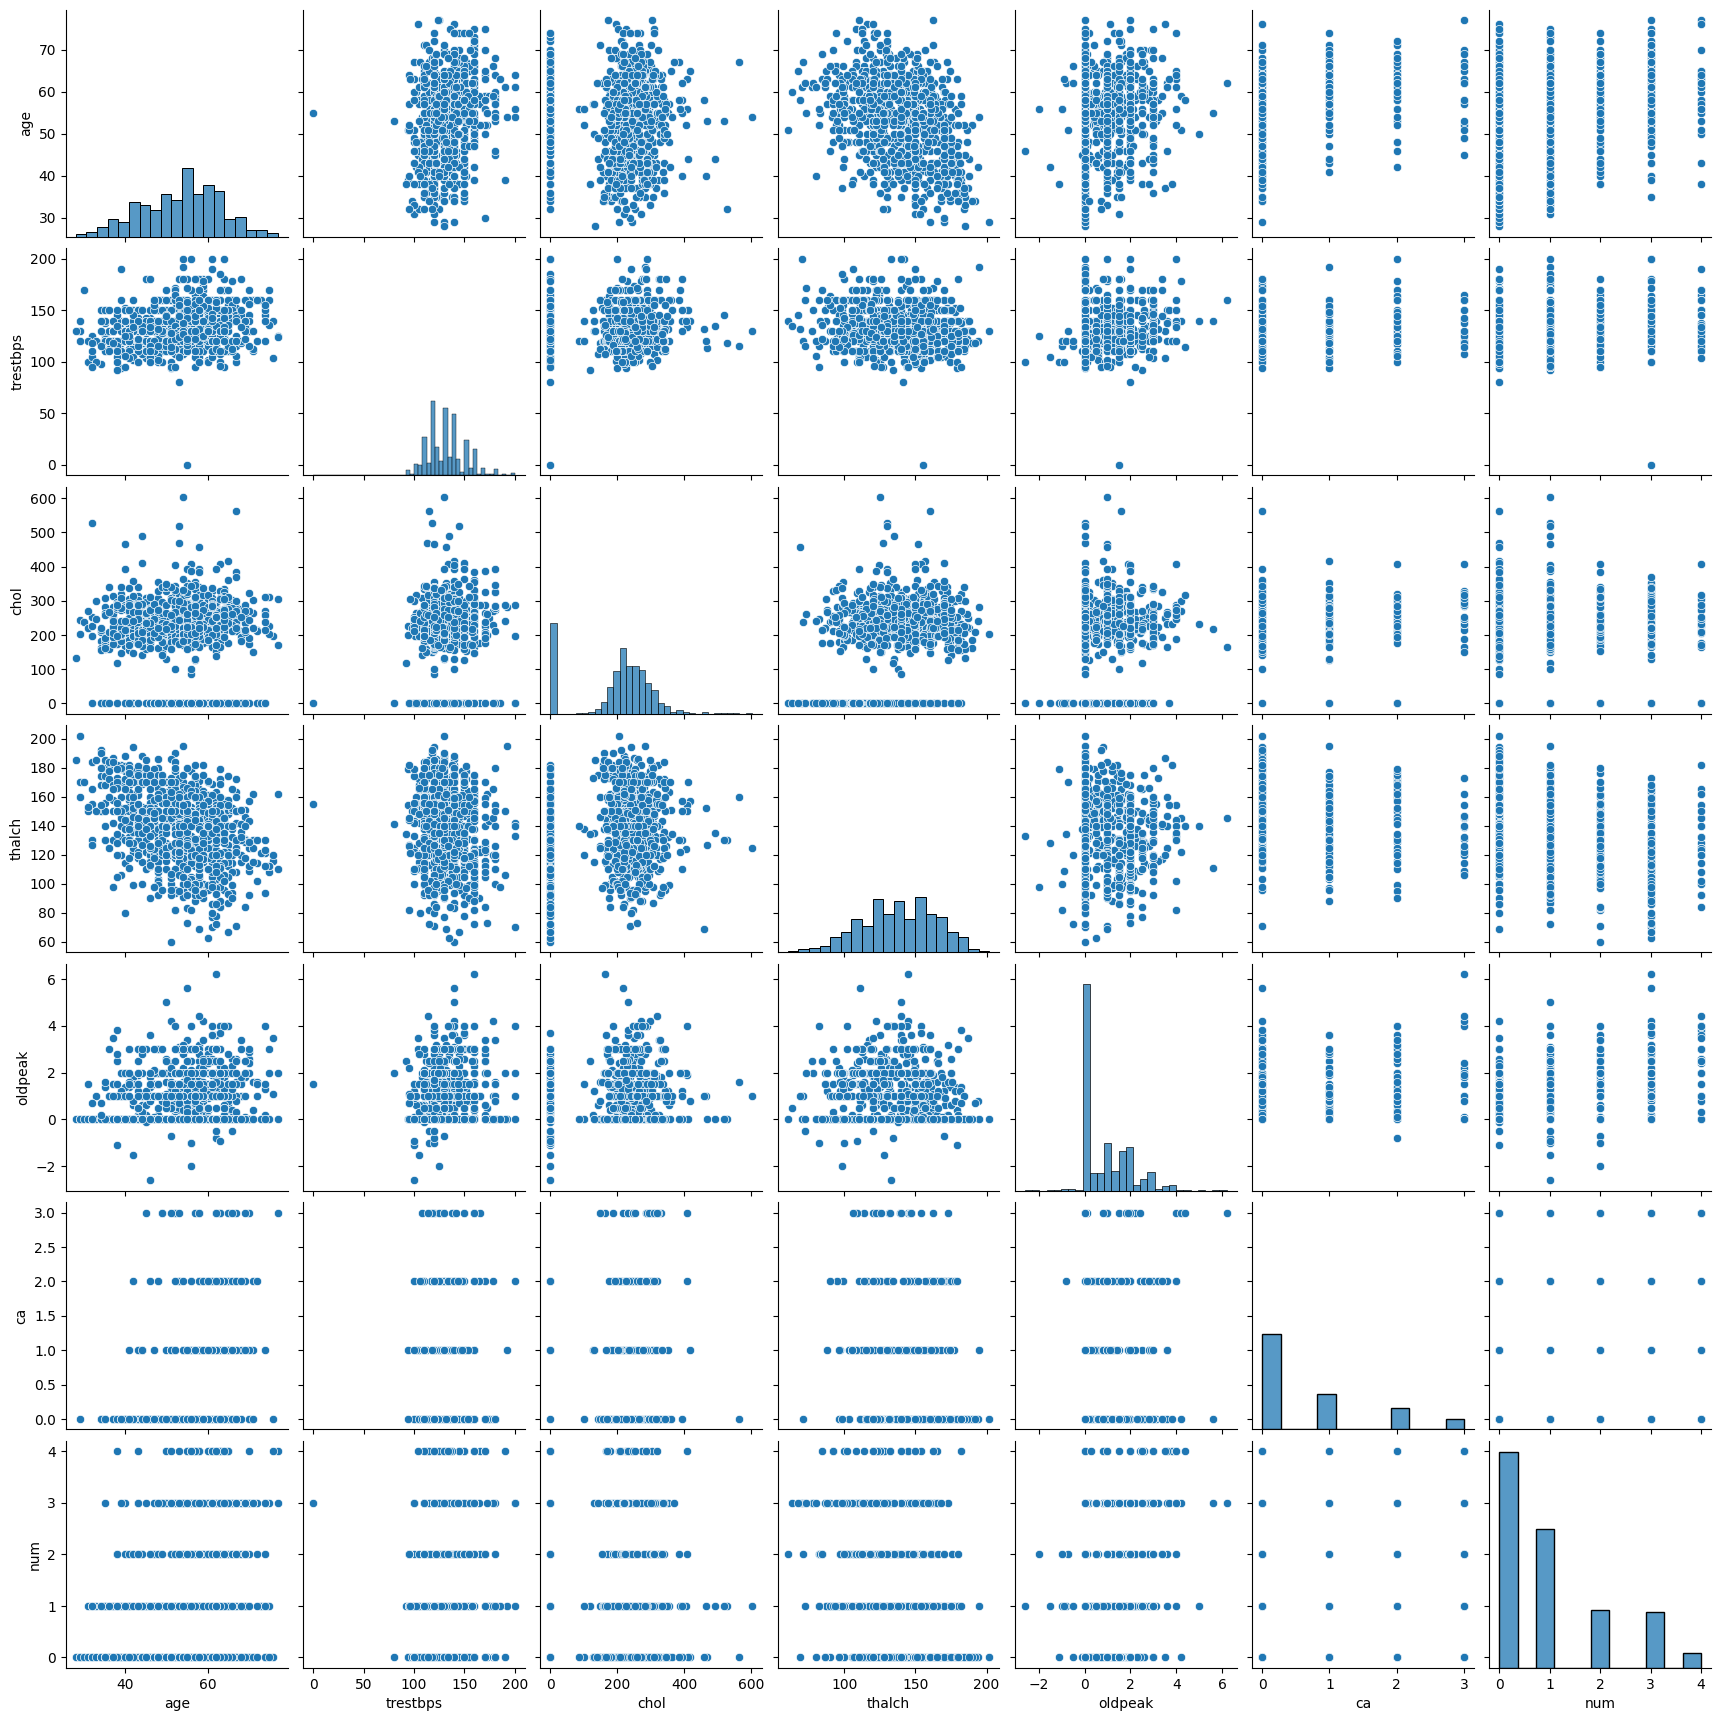

In [36]:
import seaborn as sns
sns.pairplot(df.select_dtypes(include='number'))

In [39]:
df.select_dtypes(include='number').columns

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num'], dtype='object')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


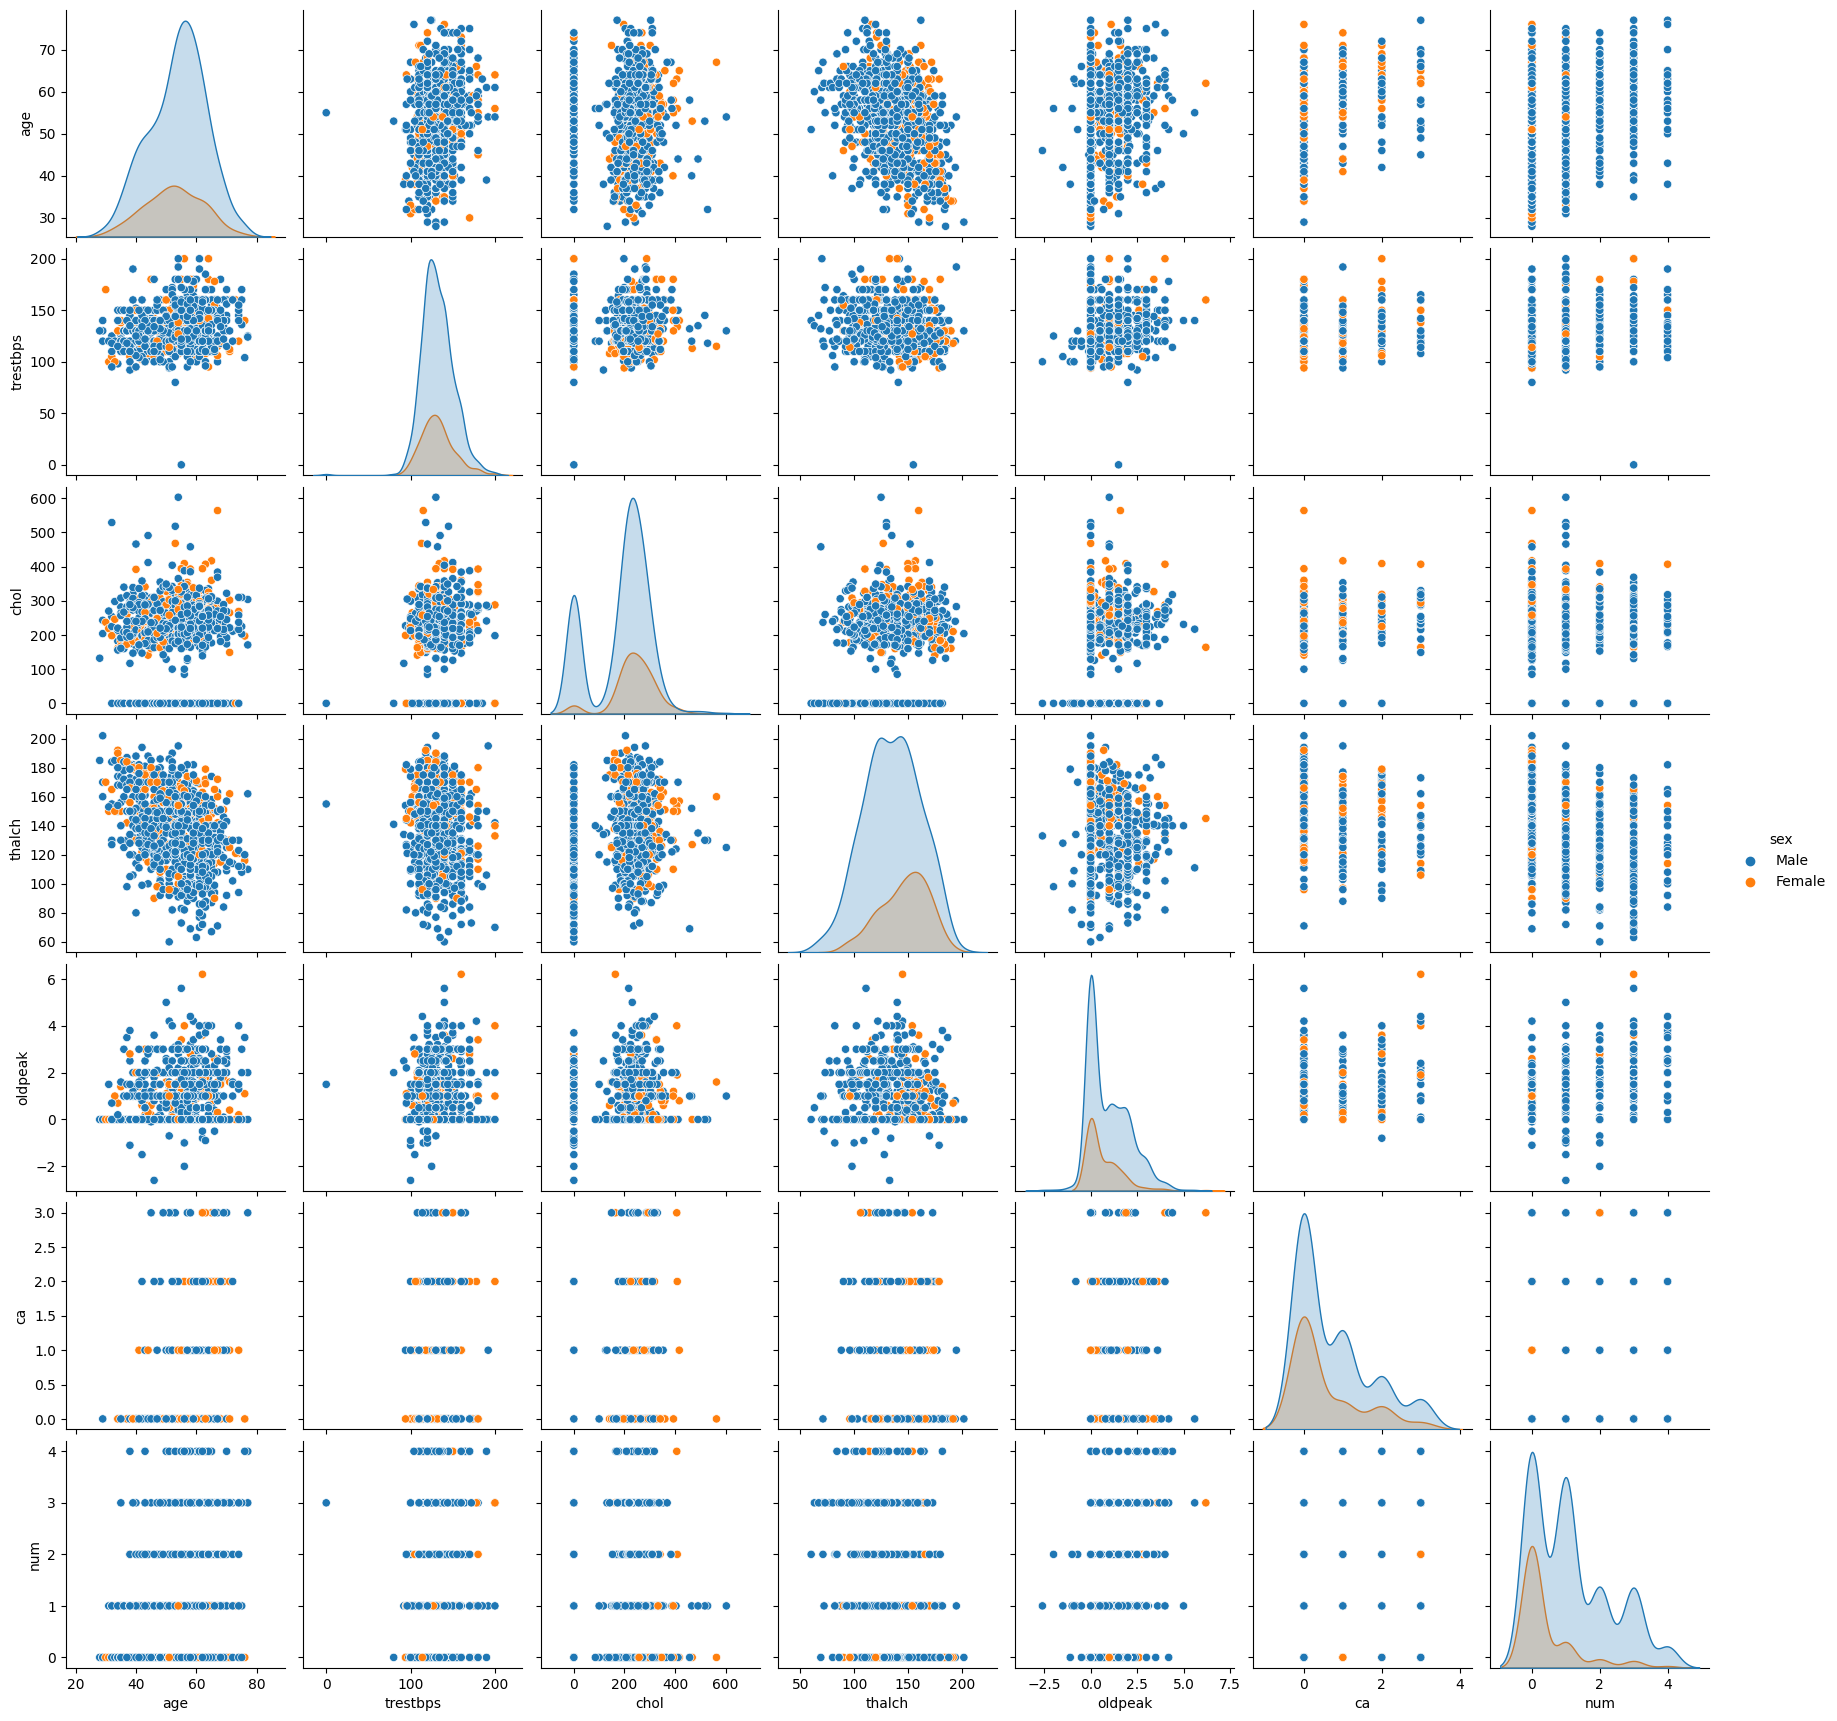

In [40]:
columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num','sex']
sns.pairplot(df[columns], hue='sex')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


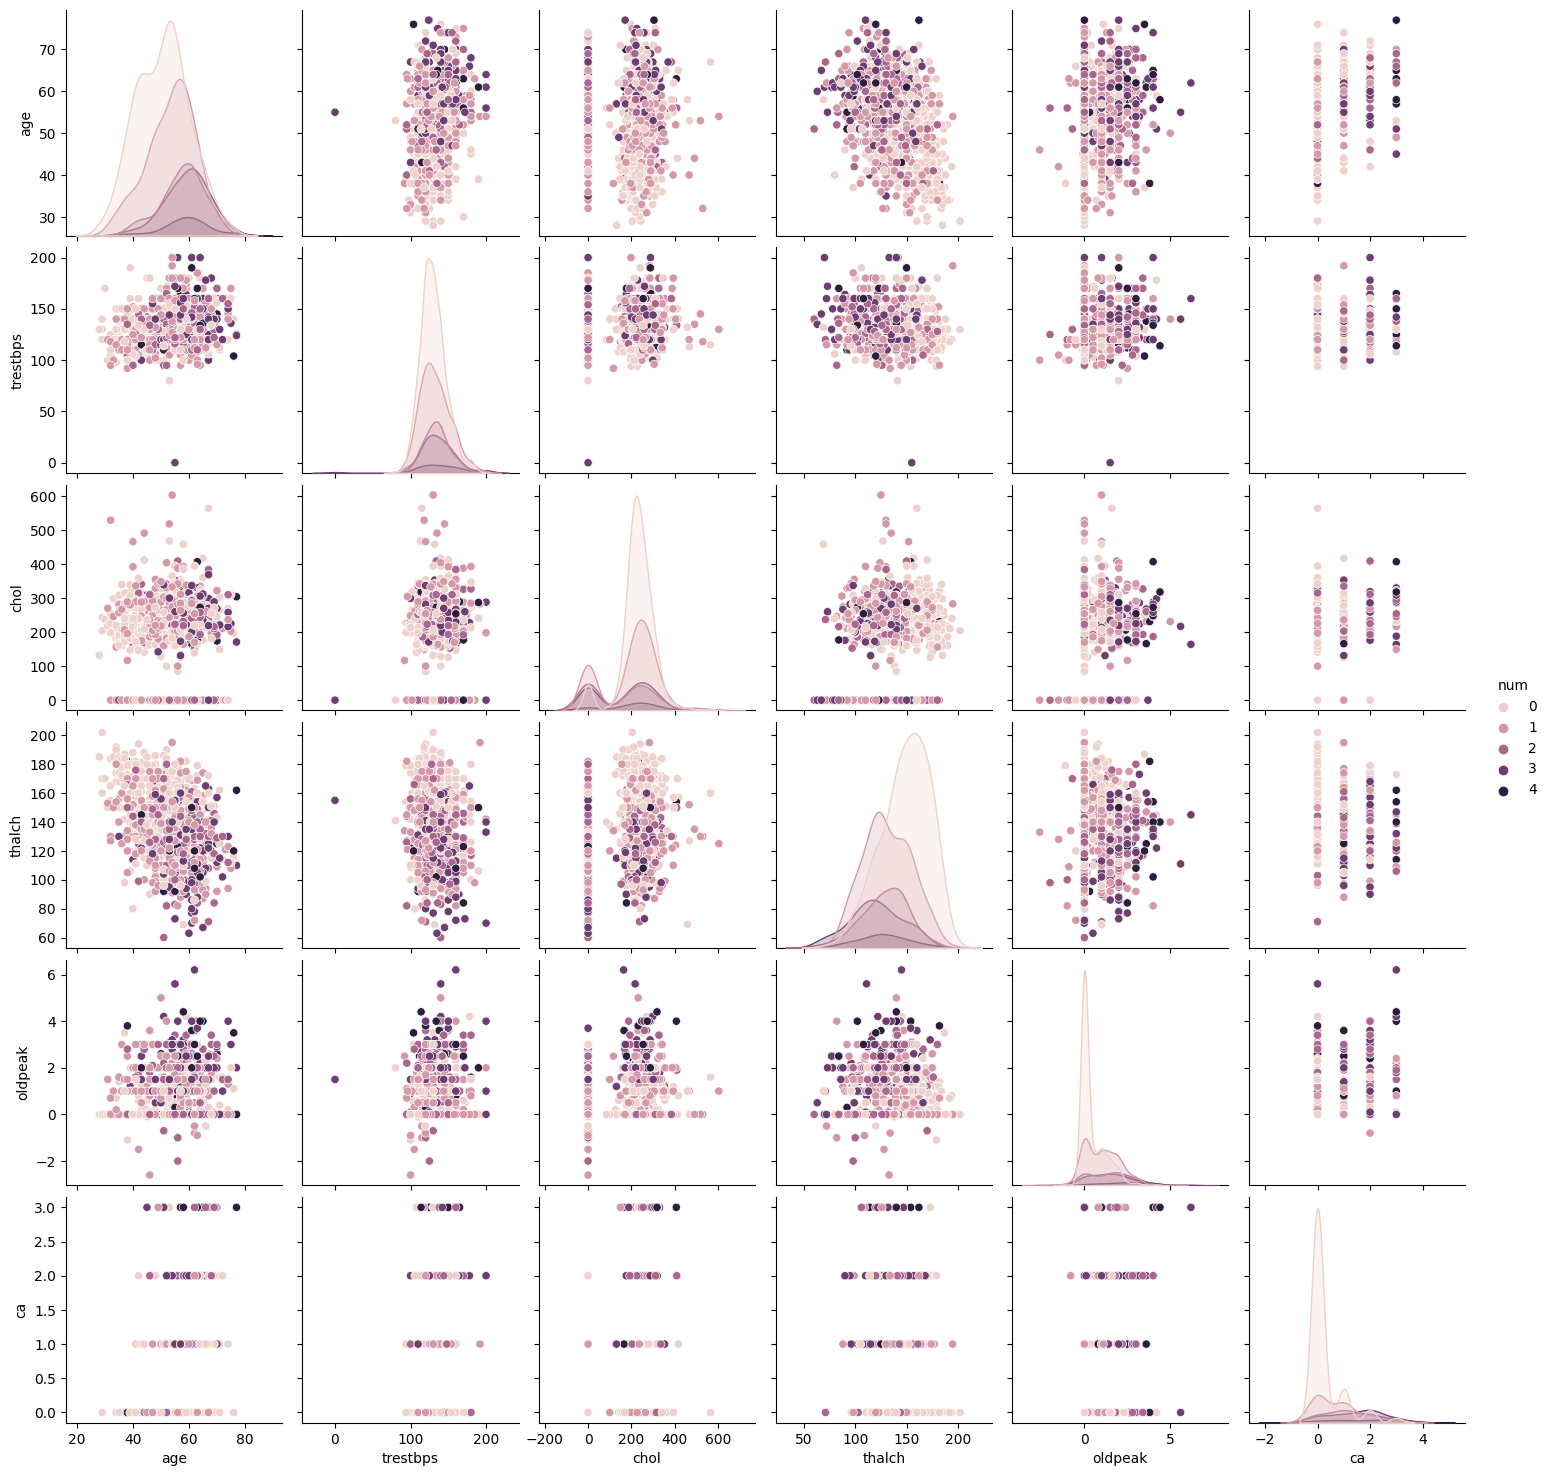

In [44]:
columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']
sns.pairplot(df[columns], hue='num')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


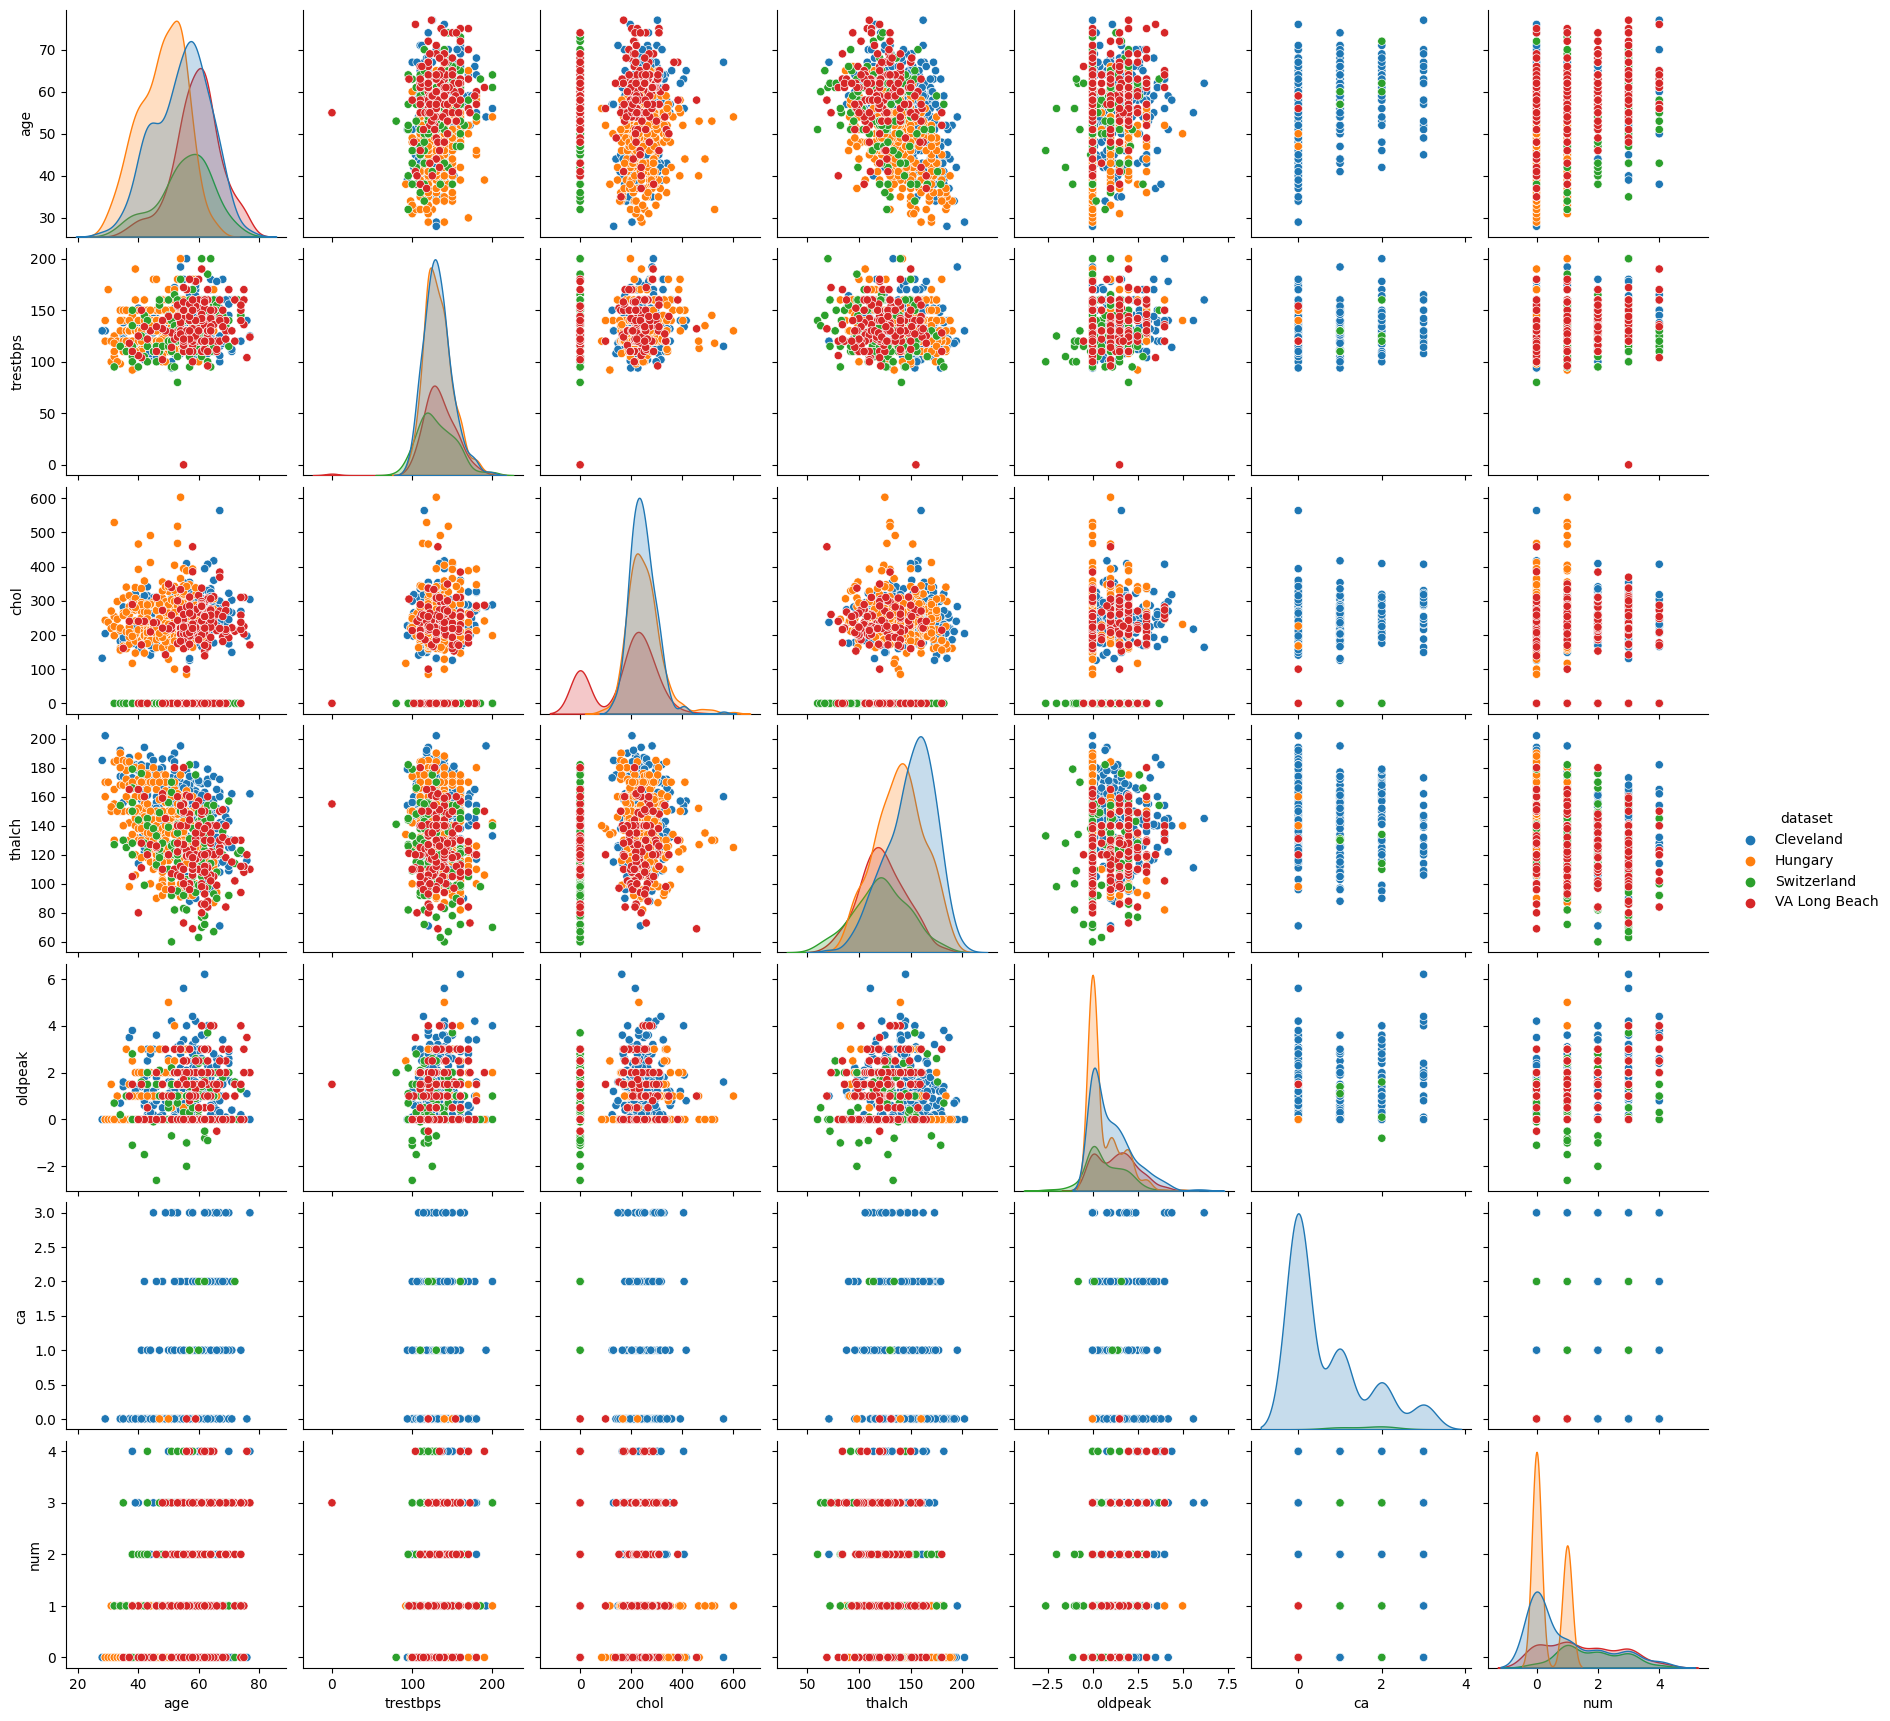

In [45]:
columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num','dataset']
sns.pairplot(df[columns], hue='dataset')

<Axes: xlabel='sex'>

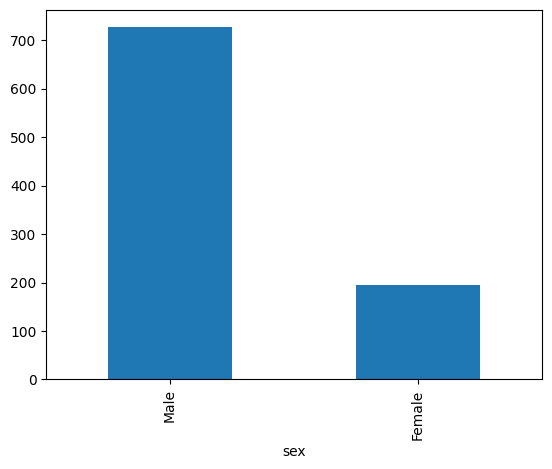

In [42]:
df['sex'].value_counts().plot.bar()

# Is the dataset balanced across sites?

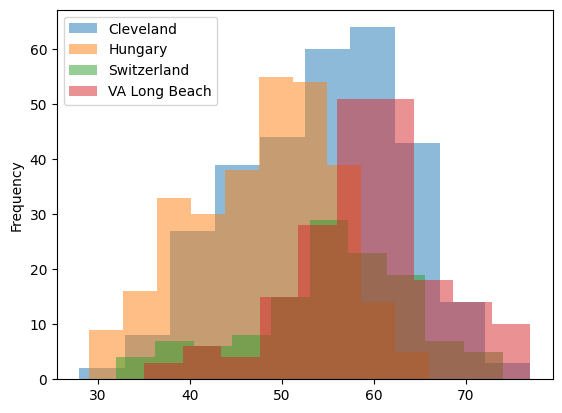

In [55]:
df.groupby('dataset')['age'].plot.hist(alpha=0.5)
plt.legend()

<Axes: title={'center': 'age'}, xlabel='dataset'>

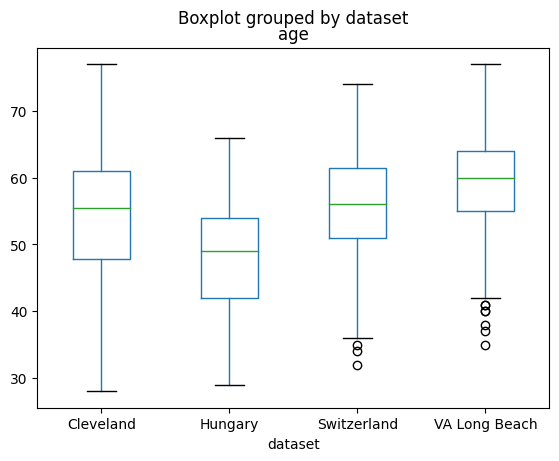

In [58]:
df.boxplot(column='age', by='dataset', grid=False)

<Axes: title={'center': 'num'}, xlabel='dataset'>

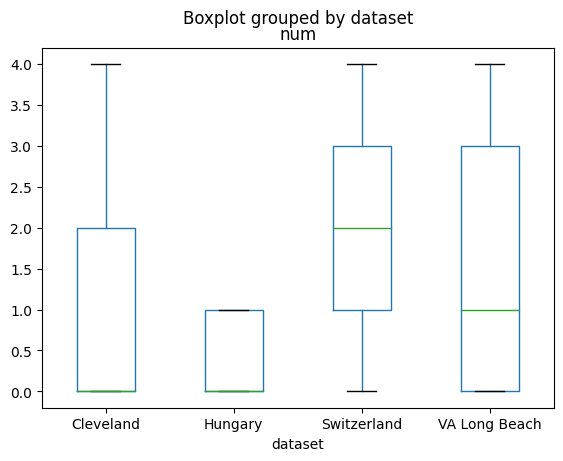

In [60]:
df.boxplot(column='num', by='dataset', grid=False)

<Axes: xlabel='dataset'>

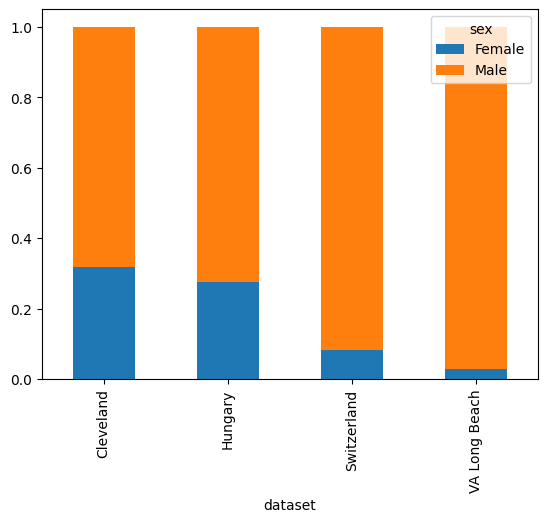

In [65]:
pd.crosstab(df['sex'],df['dataset'],normalize=1).T.plot.bar(stacked=True)

The data is not balanced with respect to `sex` and `age` across the three sites.

# Is sex a risk factor for heart disease

In [69]:
pd.crosstab(df['num'],df['sex'], margins=True)

sex  Female  Male  All
num                   
0       144   267  411
1        30   235  265
2        10    99  109
3         8    99  107
4         2    26   28
All     194   726  920

In [70]:
pd.crosstab(df['num'],df['sex'], margins=True, normalize=1)

sex    Female      Male       All
num                              
0    0.742268  0.367769  0.446739
1    0.154639  0.323691  0.288043
2    0.051546  0.136364  0.118478
3    0.041237  0.136364  0.116304
4    0.010309  0.035813  0.030435

<Axes: xlabel='sex'>

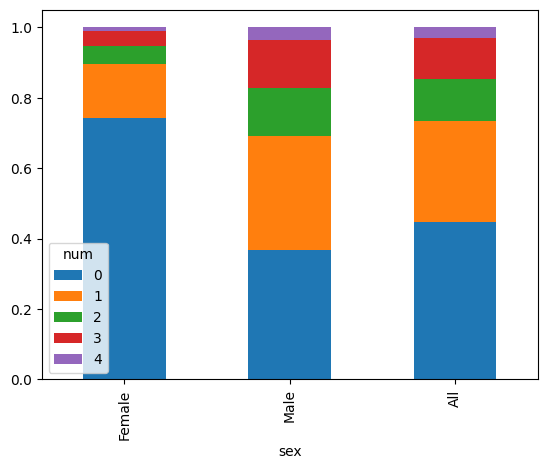

In [73]:
pd.crosstab(df['num'],df['sex'], margins=True, normalize=1).T.plot.bar(stacked=True)

It looks like there is a correlation between the `sex` and `num` variables. Let's measure the Pearson Chi2 statistic:

In [77]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(df['num'],df['sex'])).statistic

87.72950473296471

Let's compare the expected frequencies with the observed ones:

In [75]:
pd.crosstab(df['num'],df['sex'])

sex  Female  Male
num              
0       144   267
1        30   235
2        10    99
3         8    99
4         2    26

In [76]:
chi2_contingency(pd.crosstab(df['num'],df['sex'])).expected_freq

array([[ 86.6673913 , 324.3326087 ],
       [ 55.88043478, 209.11956522],
       [ 22.98478261,  86.01521739],
       [ 22.56304348,  84.43695652],
       [  5.90434783,  22.09565217]])

Let's compute the Cramer V statistic, which is normalized:

In [78]:
from scipy.stats.contingency import association
association(pd.crosstab(df['num'],df['sex']))

0.30880116145902026

Let's compute the relative risk to have a result which is easier to interpret:

<Axes: xlabel='case'>

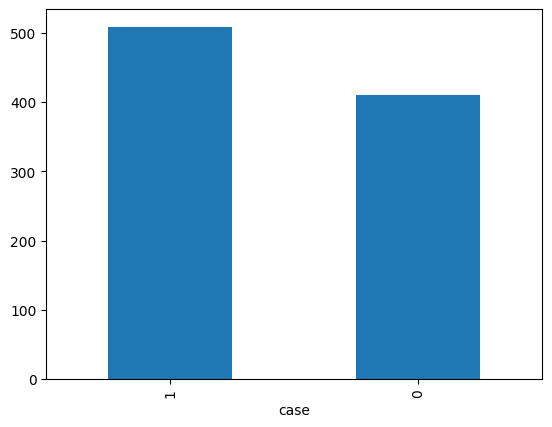

In [81]:
df['case'] = (df['num']>0).astype(int)
df['case'].value_counts().plot.bar()

In [96]:
contingency = pd.crosstab(df['case'], df['sex'])
contingency.iloc[[1,0]][['Male','Female']]

sex   Male  Female
case              
1      459      50
0      267     144

In [89]:
contingency['Female'][1]

50

In [91]:
from scipy.stats.contingency import relative_risk
relative_risk(contingency['Male'][1],contingency['Male'].sum(),contingency['Female'][1],contingency['Female'].sum()).relative_risk

2.4530578512396697

Let's compute the odds ratio:

In [97]:
from scipy.stats.contingency import odds_ratio
odds_ratio(contingency.iloc[[1,0]][['Male','Female']])

OddsRatioResult(statistic=4.942016985387771)

# Are there correlations among the numerical variables?

In [107]:
pd.crosstab(df['num'],df['ca'])

ca   0.0  1.0  2.0  3.0
num                    
0    133   21    8    3
1     28   20    7    3
2      9   14    9    4
3      8    9   15    5
4      3    3    2    5

<Axes: >

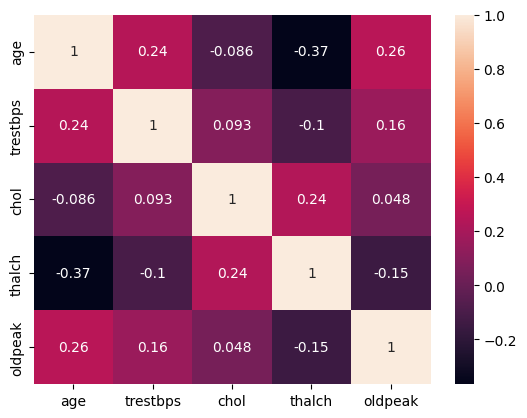

In [109]:
sns.heatmap(df.select_dtypes(include='number').drop(['case','num','ca'],axis=1).corr(), annot=True)

<Axes: xlabel='age', ylabel='thalch'>

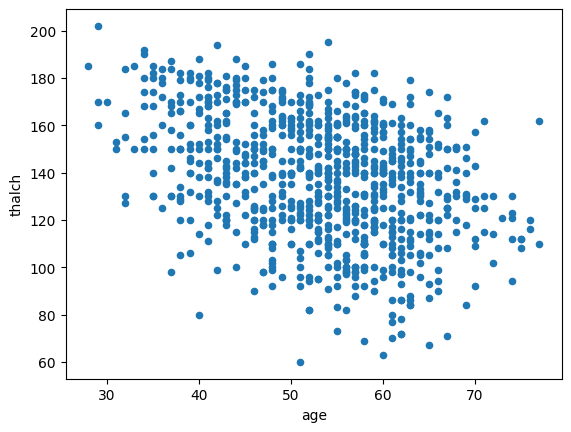

In [110]:
df.plot.scatter(x='age',y='thalch')

<Axes: xlabel='chol', ylabel='thalch'>

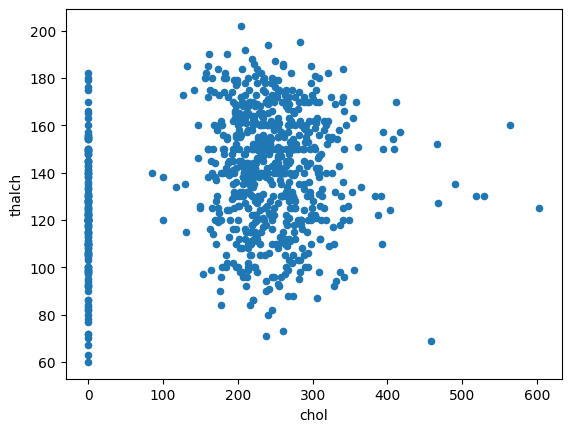

In [111]:
df.plot.scatter(x='chol',y='thalch')

# Is age is a risk factor?

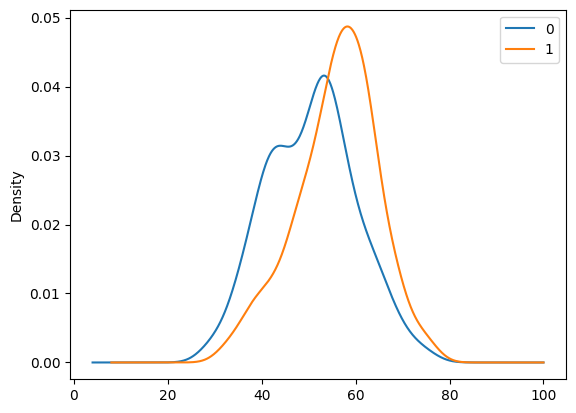

In [117]:
df.groupby('case')['age'].plot.density()
plt.legend()

In [119]:
df_case = df[df['case']==1]
df_nocase = df[df['case']==0]

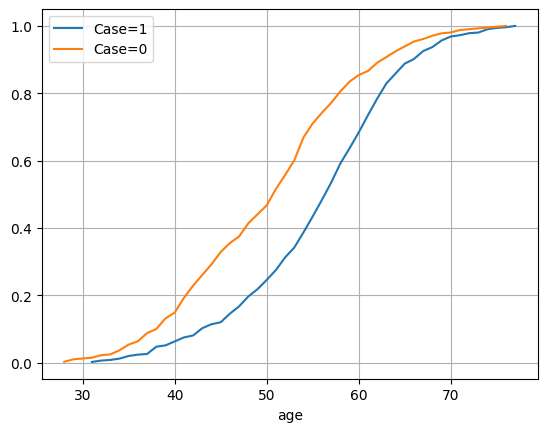

In [127]:
df_case['age'].value_counts(normalize=True).sort_index().cumsum().plot(label='Case=1')
df_nocase['age'].value_counts(normalize=True).sort_index().cumsum().plot(label='Case=0')
plt.legend()
plt.grid()

In [132]:
pd.cut(df['age'], bins=5)

id
1        (57.4, 67.2]
2        (57.4, 67.2]
3        (57.4, 67.2]
4      (27.951, 37.8]
5        (37.8, 47.6]
            ...      
916      (47.6, 57.4]
917      (57.4, 67.2]
918      (47.6, 57.4]
919      (57.4, 67.2]
920      (57.4, 67.2]
Name: age, Length: 920, dtype: category
Categories (5, interval[float64, right]): [(27.951, 37.8] < (37.8, 47.6] < (47.6, 57.4] < (57.4, 67.2] < (67.2, 77.0]]

<Axes: xlabel='age'>

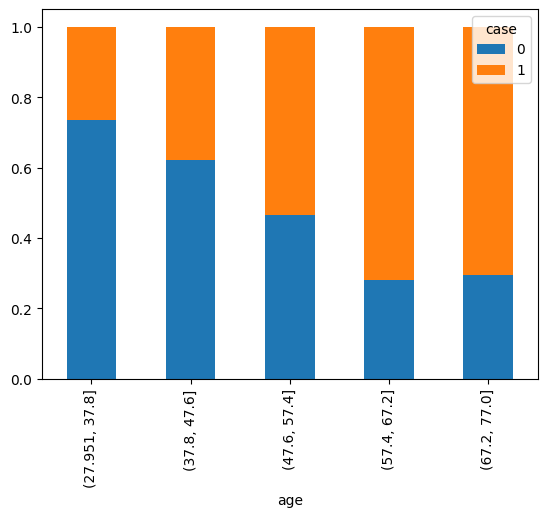

In [135]:
pd.crosstab(df['case'], pd.cut(df['age'], bins=5), normalize=1).T.plot.bar(stacked=True)

<Axes: xlabel='case'>

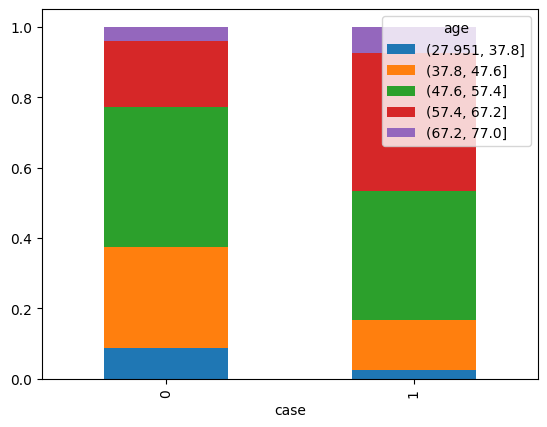

In [136]:
pd.crosstab(df['case'], pd.cut(df['age'], bins=5), normalize=0).plot.bar(stacked=True)

<Axes: xlabel='case'>

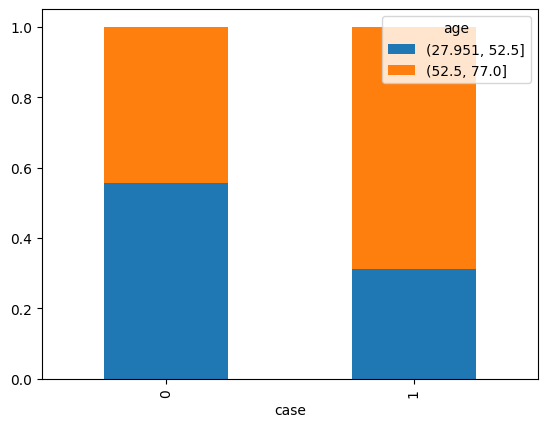

In [138]:
pd.crosstab(df['case'], pd.cut(df['age'], bins=2), normalize=0).plot.bar(stacked=True)

In [141]:
contingency = pd.crosstab(df['case'], pd.cut(df['age'], bins=2))
odds_ratio(contingency)

OddsRatioResult(statistic=2.766499032279526)

In [142]:
contingency

age   (27.951, 52.5]  (52.5, 77.0]
case                              
0                229           182
1                159           350